Tarefa 2.1 Parte A - Implementando os algoritmos pedidos:

Inicialmente, irei declarar funções para simplificar as funções do exemplo quando forem inseridas nas funções dos metodos (bisseção,posição falsa e etc...)

In [ ]:

# f(x) = x^3 - x - 1
def f19(x): return x**3 - x - 1
def df19(x): return 3*x**2 - 1
def phi19(x): return (x + 1)**(1/3)

#Exemplo 20
# f(x) = 4*sin(x) - exp(x)
def f20(x): return 4*math.sin(x) - math.exp(x)
def df20(x): return 4*math.cos(x) - math.exp(x)
def phi20(x): return math.asin(math.exp(x)/4)

#Exemplo 21
# f(x) = x*log10(x) - 1
def f21(x): return x * math.log10(x) - 1
def df21(x): return math.log10(x) + 1/math.log(10)
def phi21(x): return 1 / math.log10(x)

Bisseção - Essa parte do código implementa o método da bisseção, o qual tenta alcançar uma certa amplitude de intervalo que contém a raiz, até atingir a precisão desejada, ele faz isso através do cálculo da média de um intervalo [a,b] como é exemplificado pelo gráfico a seguir: \\

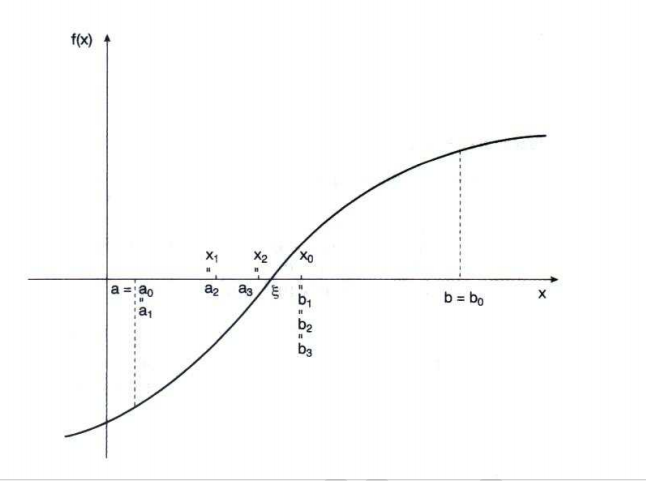



In [ ]:
#1 Dados iniciais
def metodoBissecao(f, a, b, eps):
    #2
    if (b - a) < eps:
        return (a + b) / 2
    #3
    k = 1
    #4
    M = f(a)
    while True:
        #5
        x = (a + b) / 2

        #6
        if M * f(x) > 0:
            a = x
        else:
            #7
            b = x
        #8
        if (b - a) < eps:
            erro = b-a
            return x, k, erro
        #9
        k = k + 1

Posição falsa - 

In [ ]:
 #1 Dados iniciais
def metodoPosicaoFalsa(f, a, b, e1, e2):
    #2
    if (b - a) < e1:
        return a  
    if abs(f(a)) < e2:
        return a
    if abs(f(b)) < e2:
        return b
    #3
    k = 1
    #4
    M = f(a)
    while True:
        #5
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))
        #6
        if abs(f(x)) < e2:
            return x
        #7
        if M * f(x) > 0:
            a = x
        else:
            #8
            b = x
        #9
        if (b - a) < e1:
            erro = abs(b - a)
            return x, k, erro
        #10
        k = k + 1

Método do ponto fixo - MPF

In [ ]:
#1 Dados iniciais
def metodoPontoFixo(f, phi, x0, e1, e2):
    #2
    if abs(f(x0)) < e1:
        return x0

    #3
    k = 1

    while True:
        #4
        x1 = phi(x0)
        #5
        if abs(f(x1)) < e1 or abs(x1 - x0) < e2:
            erro = abs(x1 - x0)
            return x1, k, erro
        #6
        x0 = x1
        #7
        k = k + 1

Newton-Raphson

In [ ]:
#1 Dados iniciais
def metodoNewtonRaphson(f, df, x0, e1, e2):
    #2
    if abs(f(x0)) < e1:
        return x0
    #3
    k = 1
    while True:
        #4
        f_x0 = f(x0)
        df_x0 = df(x0)
        if df_x0 == 0:
            raise ValueError("Derivada nula. O método não pode prosseguir.")
        x1 = x0 - (f_x0 / df_x0)
        #5
        if abs(f(x1)) < e1 or abs(x1 - x0) < e2:
            erro = abs(x1 - x0)
            return x1, k, erro
        #6
        x0 = x1
        #7
        k = k + 1

Secante

In [ ]:
#1 Dados iniciais
def metodoSecante(f, x0, x1, e1, e2):
    #2
    if abs(f(x0)) < e1:
        return x0
    #3
    if abs(f(x1)) < e1 or abs(x1 - x0) < e2:
        return x1
    #4
    k = 1
    while True:
        #5
        f_x1 = f(x1)
        f_x0 = f(x0)
        x2 = x1 - (f_x1 / (f_x1 - f_x0)) * (x1 - x0)
        #6
        if abs(f(x2)) < e1 or abs(x2 - x1) < e2:
            erro = abs(x2 - x1)
            return x2, k, erro
        #7
        x0 = x1
        x1 = x2
        #8
        k = k + 1

Geração da tabela igual ao exemplo 18

In [ ]:
import math
import time

def metodoBissecao(f, a, b, eps):
    inicio = time.perf_counter()
    k, M = 1, f(a)
    while True:
        x = (a + b) / 2
        if M * f(x) > 0: a = x
        else: b = x
        if (b - a) < eps:
            tempo = time.perf_counter() - inicio
            return x, k, (b - a), tempo
        k += 1

def metodoPosicaoFalsa(f, a, b, e1, e2):
    inicio = time.perf_counter()
    k, M = 1, f(a)
    while True:
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if abs(f(x)) < e2 or (b - a) < e1:
            tempo = time.perf_counter() - inicio
            return x, k, abs(b - a), tempo
        if M * f(x) > 0: a = x
        else: b = x
        k += 1

def metodoPontoFixo(f, phi, x0, e1, e2):
    inicio = time.perf_counter()
    k = 1
    while True:
        x1 = phi(x0)
        erro = abs(x1 - x0)
        if abs(f(x1)) < e1 or erro < e2:
            tempo = time.perf_counter() - inicio
            return x1, k, erro, tempo
        x0, k = x1, k + 1

def metodoNewtonRaphson(f, df, x0, e1, e2):
    inicio = time.perf_counter()
    k = 1
    while True:
        x1 = x0 - (f(x0) / df(x0))
        erro = abs(x1 - x0)
        if abs(f(x1)) < e1 or erro < e2:
            tempo = time.perf_counter() - inicio
            return x1, k, erro, tempo
        x0, k = x1, k + 1

def metodoSecante(f, x0, x1, e1, e2):
    inicio = time.perf_counter()
    k = 1
    while True:
        x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)
        erro = abs(x2 - x1)
        if abs(f(x2)) < e1 or erro < e2:
            tempo = time.perf_counter() - inicio
            return x2, k, erro, tempo
        x0, x1, k = x1, x2, k + 1
f = lambda x: math.exp(-(x**2)) - math.cos(x)
df = lambda x: -2 * x * math.exp(-(x**2)) + math.sin(x)
phi = lambda x: math.cos(x) - math.exp(-(x**2)) + x
e1 = e2 = 1e-4

#Exibição do exemplo 18
res_final = [
    ("Bisseccao", metodoBissecao(f, 1, 2, e1)),
    ("Posicao Falsa", metodoPosicaoFalsa(f, 1, 2, e1, e2)),
    ("MPF", metodoPontoFixo(f, phi, 1.5, e1, e2)),
    ("Newton", metodoNewtonRaphson(f, df, 1.5, e1, e2)),
    ("Secante", metodoSecante(f, 1, 2, e1, e2))
]

print(f"{'Método':<14} | {'x_barra':<10} | {'f(x_barra)':<10} | {'Erro x':<10} | {'Iter':<4} | {'T. Total':<9} | {'T/Iter'}")
print("-" * 85)
for nome, (raiz, k, erro, t_total) in res_final:
    t_iter = t_total / k if k > 0 else t_total
    print(f"{nome:<14} | {raiz:.6f} | {f(raiz):.2e} | {erro:.2e} | {k:<4} | {t_total:.2e} | {t_iter:.2e}")

Método         | x_barra    | f(x_barra) | Erro x     | Iter | T. Total  | T/Iter
-------------------------------------------------------------------------------------
Bisseccao      | 1.447449 | 2.19e-05 | 6.10e-05 | 14   | 1.46e-05 | 1.04e-06
Posicao Falsa  | 1.447357 | -3.64e-05 | 5.53e-01 | 6    | 9.30e-06 | 1.55e-06
MPF            | 1.447525 | 7.03e-05 | 1.93e-04 | 6    | 3.90e-06 | 6.50e-07
Newton         | 1.447416 | 1.32e-06 | 1.71e-03 | 2    | 3.00e-06 | 1.50e-06
Secante        | 1.447413 | -5.24e-07 | 1.86e-04 | 5    | 5.10e-06 | 1.02e-06


Exemplo 19


In [ ]:
#Exibição para o exemplo 19
f = lambda x: x**3 - x - 1
df = lambda x: 3*x**2 - 1
phi = lambda x: (x + 1)**(1/3)
e1 = e2 = 1e-6
res_ex19 = [
    ("Bisseccao", metodoBissecao(f, 1, 2, e1)),
    ("Posicao Falsa", metodoPosicaoFalsa(f, 1, 2, e1, e2)),
    ("MPF", metodoPontoFixo(f, phi, 1, e1, e2)),
    ("Newton", metodoNewtonRaphson(f, df, 0, e1, e2)),
    ("Secante", metodoSecante(f, 0, 0.5, e1, e2))
]

header = f"{'Método':<14} | {'x_barra':<10} | {'f(x_barra)':<10} | {'Erro x':<10} | {'Iter':<4} | {'T. Total':<9} | {'T/Iter'}"
print(header)
print("-" * 90)

for nome, (raiz, k, erro, t_total) in res_ex19:
    t_iter = t_total / k if k > 0 else t_total
    print(f"{nome:<14} | {raiz:.6f} | {f(raiz):.2e} | {erro:.2e} | {k:<4} | {t_total:.2e} | {t_iter:.2e}")

Método         | x_barra    | f(x_barra) | Erro x     | Iter | T. Total  | T/Iter
------------------------------------------------------------------------------------------
Bisseccao      | 1.324718 | -1.86e-06 | 9.54e-07 | 20   | 1.05e-05 | 5.25e-07
Posicao Falsa  | 1.324718 | -8.29e-07 | 6.75e-01 | 17   | 4.11e-05 | 2.42e-06
MPF            | 1.324718 | -4.74e-07 | 4.74e-07 | 9    | 6.30e-06 | 7.00e-07
Newton         | 1.324718 | 2.75e-12 | 8.31e-07 | 21   | 1.45e-05 | 6.90e-07
Secante        | 1.324718 | -4.34e-08 | 1.19e-05 | 26   | 1.78e-05 | 6.85e-07


Exemplo 20

In [ ]:
# f(x) = 4sin(x) - exp(x)
f = lambda x: 4 * math.sin(x) - math.exp(x)
df = lambda x: 4 * math.cos(x) - math.exp(x)
phi = lambda x: x - 2 * math.sin(x) + 0.5 * math.exp(x)
e1 = e2 = 1e-5
#exibição para o exemplo 20
res_ex20 = [
    ("Bisseccao", metodoBissecao(f, 0, 1, e1)),
    ("Posicao Falsa", metodoPosicaoFalsa(f, 0, 1, e1, e2)),
    ("MPF", metodoPontoFixo(f, phi, 0.5, e1, e2)),
    ("Newton", metodoNewtonRaphson(f, df, 0.5, e1, e2)),
    ("Secante", metodoSecante(f, 0, 1, e1, e2))
]

header = f"{'Método':<14} | {'x_barra':<10} | {'f(x_barra)':<10} | {'Erro x':<10} | {'Iter':<4} | {'T. Total':<9} | {'T/Iter'}"
print(header)
print("-" * 92)

for nome, (raiz, k, erro, t_total) in res_ex20:
    t_iter = t_total / k if k > 0 else t_total
    print(f"{nome:<14} | {raiz:.8f} | {f(raiz):.2e} | {erro:.2e} | {k:<4} | {t_total:.2e} | {t_iter:.2e}")

Exemplo 21

In [24]:
f = lambda x: x * math.log10(x) - 1
df = lambda x: math.log10(x) + (1 / math.log(10))
phi = lambda x: x - 1.3 * (x * math.log10(x) - 1)
e1 = e2 = 1e-7
#exibição exemplo 21
res_ex21 = [
    ("Bisseccao", metodoBissecao(f, 2, 3, e1)),
    ("Posicao Falsa", metodoPosicaoFalsa(f, 2, 3, e1, e2)),
    ("MPF", metodoPontoFixo(f, phi, 2.5, e1, e2)),
    ("Newton", metodoNewtonRaphson(f, df, 2.5, e1, e2)),
    ("Secante", metodoSecante(f, 2.3, 2.7, e1, e2))
]

header = f"{'Método':<14} | {'x_barra':<10} | {'f(x_barra)':<10} | {'Erro x':<10} | {'Iter':<4} | {'T. Total':<9} | {'T/Iter'}"
print(header)
print("-" * 92)

for nome, (raiz, k, erro, t_total) in res_ex21:
    t_iter = t_total / k if k > 0 else t_total
    print(f"{nome:<14} | {raiz:.8f} | {f(raiz):.2e} | {erro:.2e} | {k:<4} | {t_total:.2e} | {t_iter:.2e}")

Método         | x_barra    | f(x_barra) | Erro x     | Iter | T. Total  | T/Iter
--------------------------------------------------------------------------------------------
Bisseccao      | 2.50618416 | 1.26e-08 | 5.96e-08 | 24   | 1.23e-05 | 5.12e-07
Posicao Falsa  | 2.50618403 | -9.93e-08 | 4.94e-01 | 5    | 6.60e-06 | 1.32e-06
MPF            | 2.50618417 | 2.05e-08 | 3.20e-07 | 5    | 3.00e-06 | 6.00e-07
Newton         | 2.50618415 | 1.38e-12 | 3.99e-06 | 2    | 3.90e-06 | 1.95e-06
Secante        | 2.50618418 | 2.92e-08 | 8.06e-05 | 3    | 2.40e-06 | 8.00e-07


Exemplo 22

In [25]:

f = lambda x: x**3 - 3.5*x**2 + 4*x - 1.5
df = lambda x: 3*x**2 - 7*x + 4
e1 = e2 = 1e-4
testes_newton = [
    ("Teste 1 (x0=0.5)", metodoNewtonRaphson(f, df, 0.5, e1, e2)),
    ("Teste 2 (x0=1.33333)", metodoNewtonRaphson(f, df, 1.33333, e1, e2)),
    ("Teste 3 (x0=1.33334)", metodoNewtonRaphson(f, df, 1.33334, e1, e2))
]

header = f"{'Cenário':<18} | {'x_barra':<11} | {'f(x_barra)':<11} | {'Erro x':<10} | {'Iter':<4} | {'T. Total'}"
print(header)
print("-" * 80)

for nome, (raiz, k, erro, t_total) in testes_newton:
    print(f"{nome:<18} | {raiz:.8f} | {f(raiz):.2e} | {erro:.2e} | {k:<4} | {t_total:.2e}")

Cenário            | x_barra     | f(x_barra)  | Erro x     | Iter | T. Total
--------------------------------------------------------------------------------
Teste 1 (x0=0.5)   | 0.98607192 | -9.97e-05 | 1.32e-02 | 6    | 1.12e-05
Teste 2 (x0=1.33333) | 0.99084922 | -4.26e-05 | 8.84e-03 | 30   | 2.74e-05
Teste 3 (x0=1.33334) | 1.50003499 | 8.75e-06 | 2.95e-03 | 26   | 2.00e-05
